In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

### Modelling a transient plug flow reactor

- Transient state
$\frac{∂C_A}{∂t}=−ν_0\frac{∂C_A}{∂V}+r_A$

- Steady state
$\frac{∂C_A}{∂V}=\frac{r_A}{v_0}$

where\
$r_A = -kC_A^2$

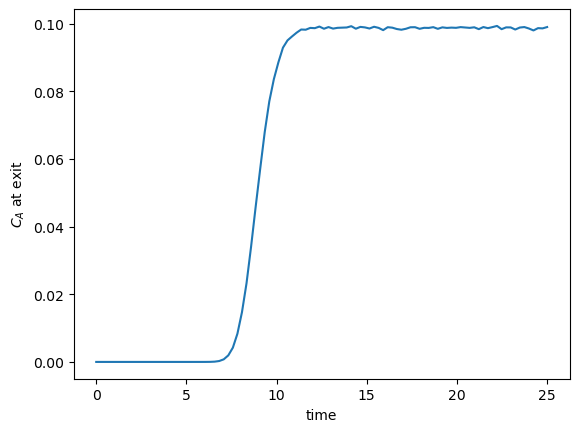

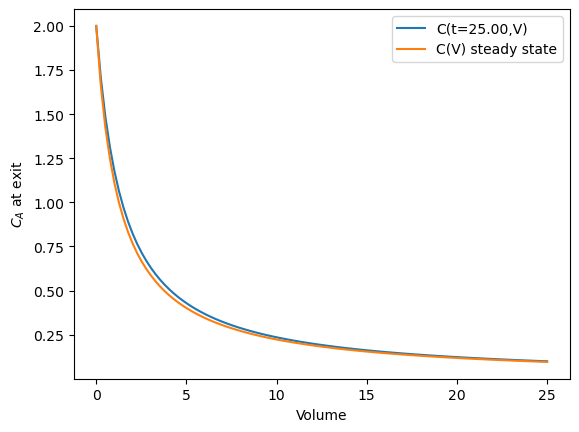

In [2]:
# Your code here
N = 100
volume = 20
dV = volume / N
k = 1
v0 = 2

# Temporal discretization
tStart = 0
tEnd = 25
tspan = np.linspace(tStart, tEnd, N)

# slower
# def method_of_lines(t, C, k, v0, dV):
#     dCdt = np.zeros_like(C)
#     dCdt[0] = 0

#     for i in range(1, len(C)):
#         dCdt[i] = -v0 * (C[i] - C[i-1]) / dV - k * C[i]**2
   
#     return dCdt


# vectorized operation - faster
def method_of_lines(t, C, k, v0, dV): 
    
    dCdt = np.ones(len(C))
    dCdt[0] = 0
    dCdt[1:] = - v0*(np.diff(C))/dV - k*(C[1:]**2)        
    
    return dCdt

args = (k, v0, dV)

# Call the method_of_lines function with appropriate arguments
C_A0 = 2
C_init = np.zeros(N)
C_init[0] = C_A0

sol_method_of_lines = solve_ivp(method_of_lines, (0, tspan[-1]), C_init, t_eval=tspan, args=args)

fig, ax = plt.subplots()

ax.plot(sol_method_of_lines.t, sol_method_of_lines.y[-1])
ax.set_xlabel('time')
ax.set_ylabel('$C_A$ at exit')

def steady_state(V, C, k, v0):
    
    return -k * C**2 / v0

sol_steady_state = solve_ivp(steady_state, (0, volume), [C_A0], args = (k, v0), t_eval = np.linspace(0, volume, N))

fig, ax = plt.subplots()

x_eval = sol_method_of_lines.t

ax.plot(x_eval, sol_method_of_lines.y[:, -1], label = 'C(t={0:1.2f},V)'.format(tspan[-1]))
ax.plot(x_eval, sol_steady_state.y[0], label = "C(V) steady state")

ax.set_xlabel('Volume')
ax.set_ylabel('$C_A$ at exit')
ax.legend()

### Observations

After approximately one space time, the steady state solution is reached at the exit. For completeness, we also examine the steady state solution.

There is some minor disagreement between the final transient solution and the steady state solution. That is due to the approximation in discretizing the reactor volume. In this example we used 100 nodes. You get better agreement with a larger number of nodes, say 200 or more. Of course, it takes slightly longer to compute then, since the number of coupled odes is equal to the number of nodes.